In [4]:
import warnings
warnings.simplefilter("ignore")

In [5]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Feedback de tus modelos

<div class="alert alert-success">
  Ciertos modelos como la regresión o los arboles se dicen **"interpretables"**. Esto quiere decir que de los resultados de los modelos podemos sacar conclusiones o **"insights"**.
</div>

En particular la regresión Lasso es interpretable: 

- mientras más grande el coeficiente para una feature, más relevante es esta para la regresión.
- la regresión Lasso trata de seleccionar un pequeño número de features relevantes.

In [6]:
X = pd.read_csv(r'.\X_opening.csv', encoding='utf-8')
y = X['worldwide_gross']
X = X.drop('worldwide_gross',axis=1)
# X = X.drop(['opening_gross','screens'],axis=1)
X

,production_budget,title_year,aspect_ratio,duration.1,cast_total_facebook_likes,budget,imdb_score
0,425000000.0,2009.000000,1.780000,178.000000,4834.0,2.370000e+08,7.9
1,306000000.0,2002.130733,2.126976,108.577186,143.0,4.045539e+07,7.1
2,300000000.0,2007.000000,2.350000,169.000000,48350.0,3.000000e+08,7.1
3,300000000.0,2015.000000,2.350000,148.000000,11700.0,2.450000e+08,6.8
4,275000000.0,2012.000000,2.350000,164.000000,106759.0,2.500000e+08,8.5
...,...,...,...,...,...,...,...
4099,7000.0,2004.000000,1.850000,77.000000,368.0,7.000000e+03,7.0
4100,7000.0,2005.000000,2.126976,80.000000,0.0,7.000000e+03,6.3
4101,7000.0,2005.000000,2.126976,84.000000,93.0,3.250000e+03,7.8
4102,3967.0,2012.000000,2.350000,100.000000,2386.0,4.045539e+07,6.3


In [7]:
from sklearn.linear_model import Lasso

model = Lasso()

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y)

In [9]:
len(X_train)/len(X)

0.75

In [10]:
model.fit(X_train,y_train)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [11]:
model.score(X_test,y_test)

0.579216248119639

In [12]:
model.coef_

array([ 3.10365862e+00, -3.61813946e+04, -7.71242003e+06,  3.35218702e+04,
        1.40995676e+02, -1.21529432e-02,  2.60522853e+07])

In [13]:
var = np.floor(np.log10(np.abs(model.coef_)))
var

array([ 0.,  4.,  6.,  4.,  2., -2.,  7.])

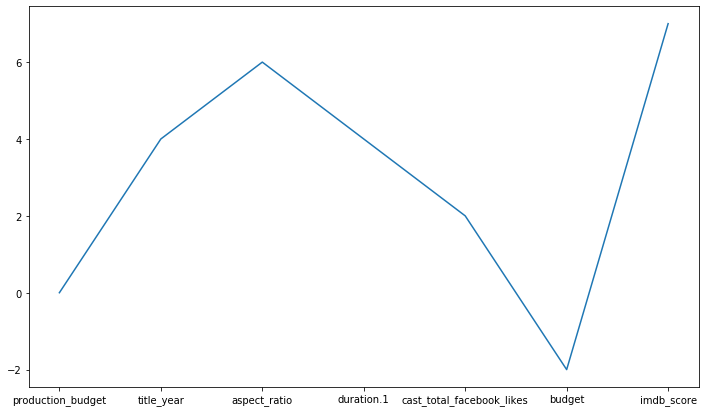

In [14]:
plt.rcParams["figure.figsize"] = [12,7]
plt.plot(var)
plt.xticks(np.arange(7),list(X.columns));

Esto nos guía a guardar únicamente:

- production_budget
- title_year
- duration
- cast_total_facebook_likes
- imdb_score

## Correlación entre variables

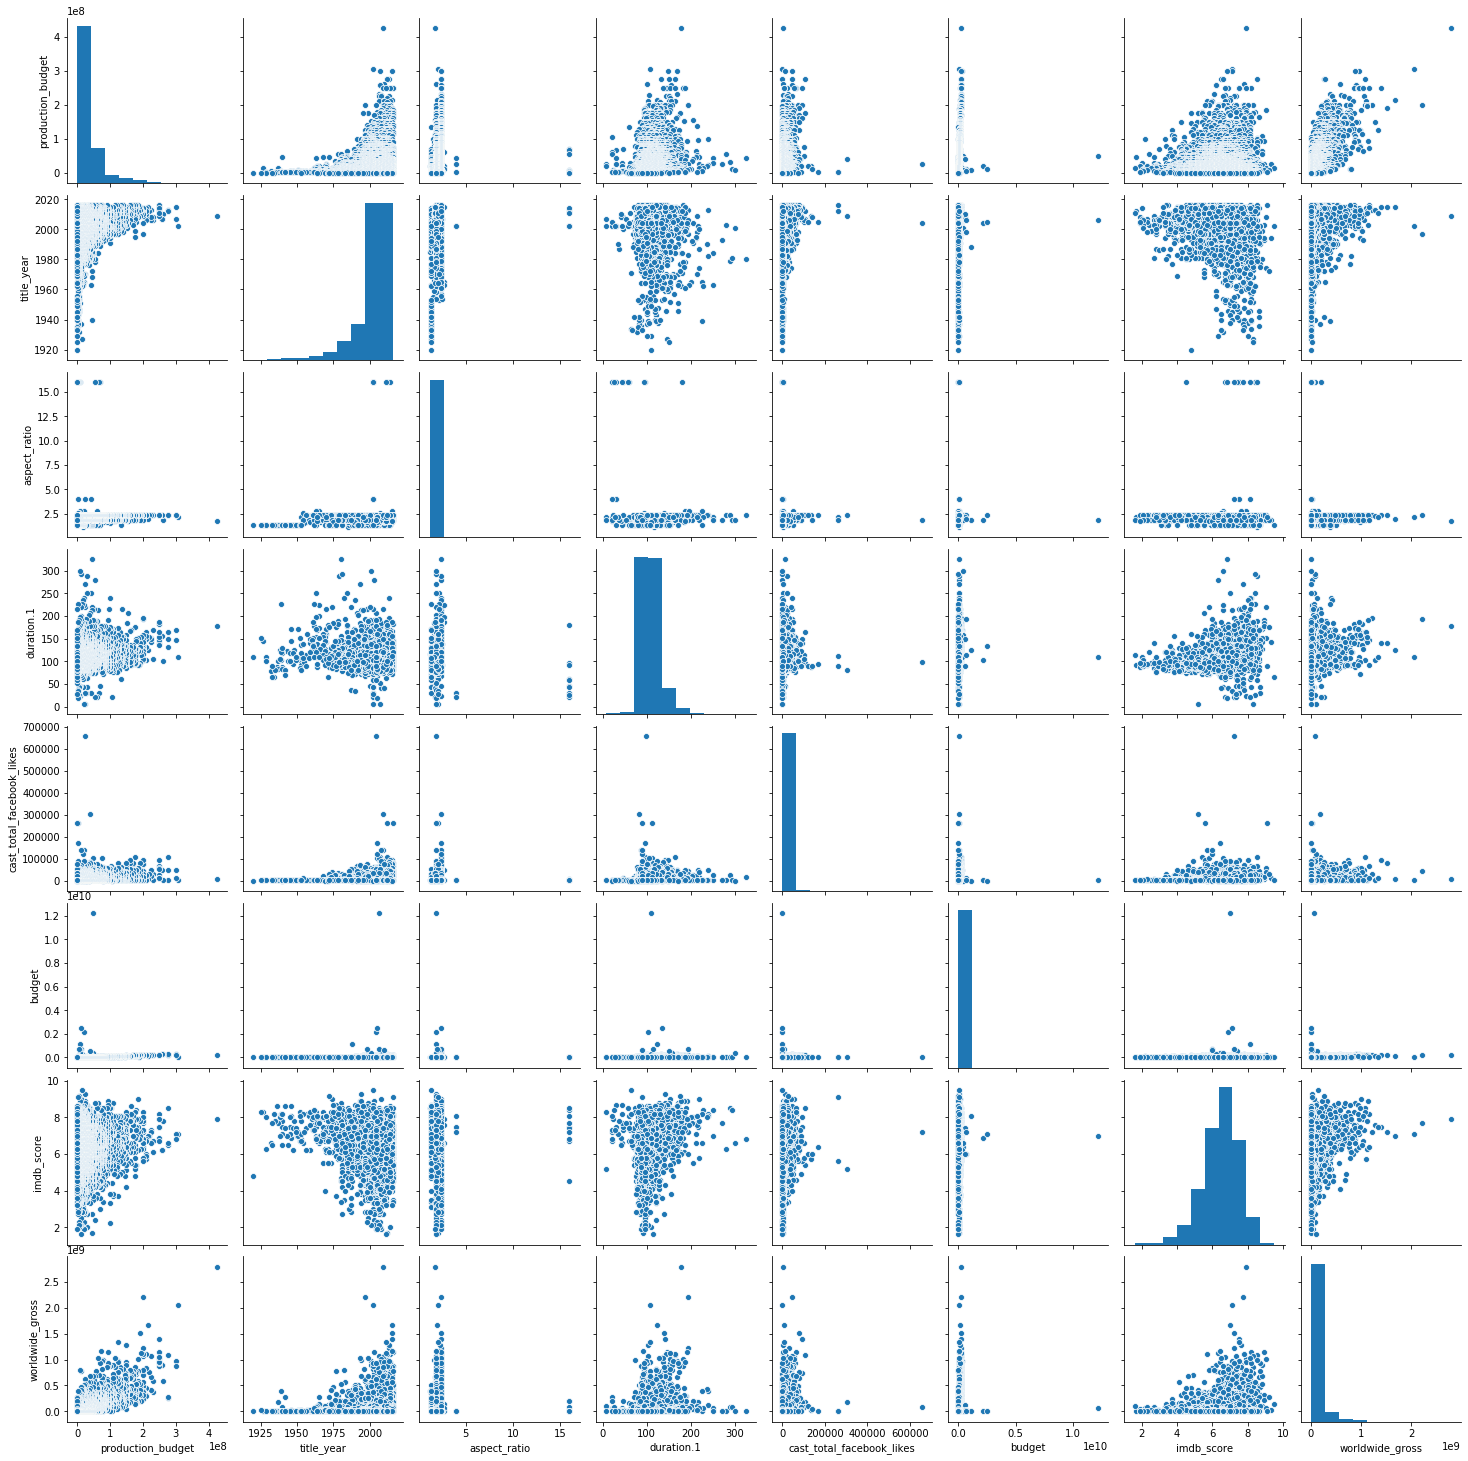

In [15]:
import seaborn as sns

Z = pd.concat([X,y],axis=1)
sns.pairplot(Z)

#Tanto filas y columnas tenemos features
#En la columna tendremos la distruibucion de cada variable (¿Como esta distribuida cada variable?)
#Los scatter plots nos muestran la correlacion que hay entre las variables


In [16]:
pd.cut(X['production_budget'],8).cat.codes


0       6
1       5
2       4
3       4
4       4
       ..
4099    0
4100    0
4101    0
4102    0
4103    0
Length: 4104, dtype: int8

In [43]:
clase = pd.cut(X['production_budget'],8).cat.codes.rename('class')
Z2 = pd.concat([X,clase],axis=1)

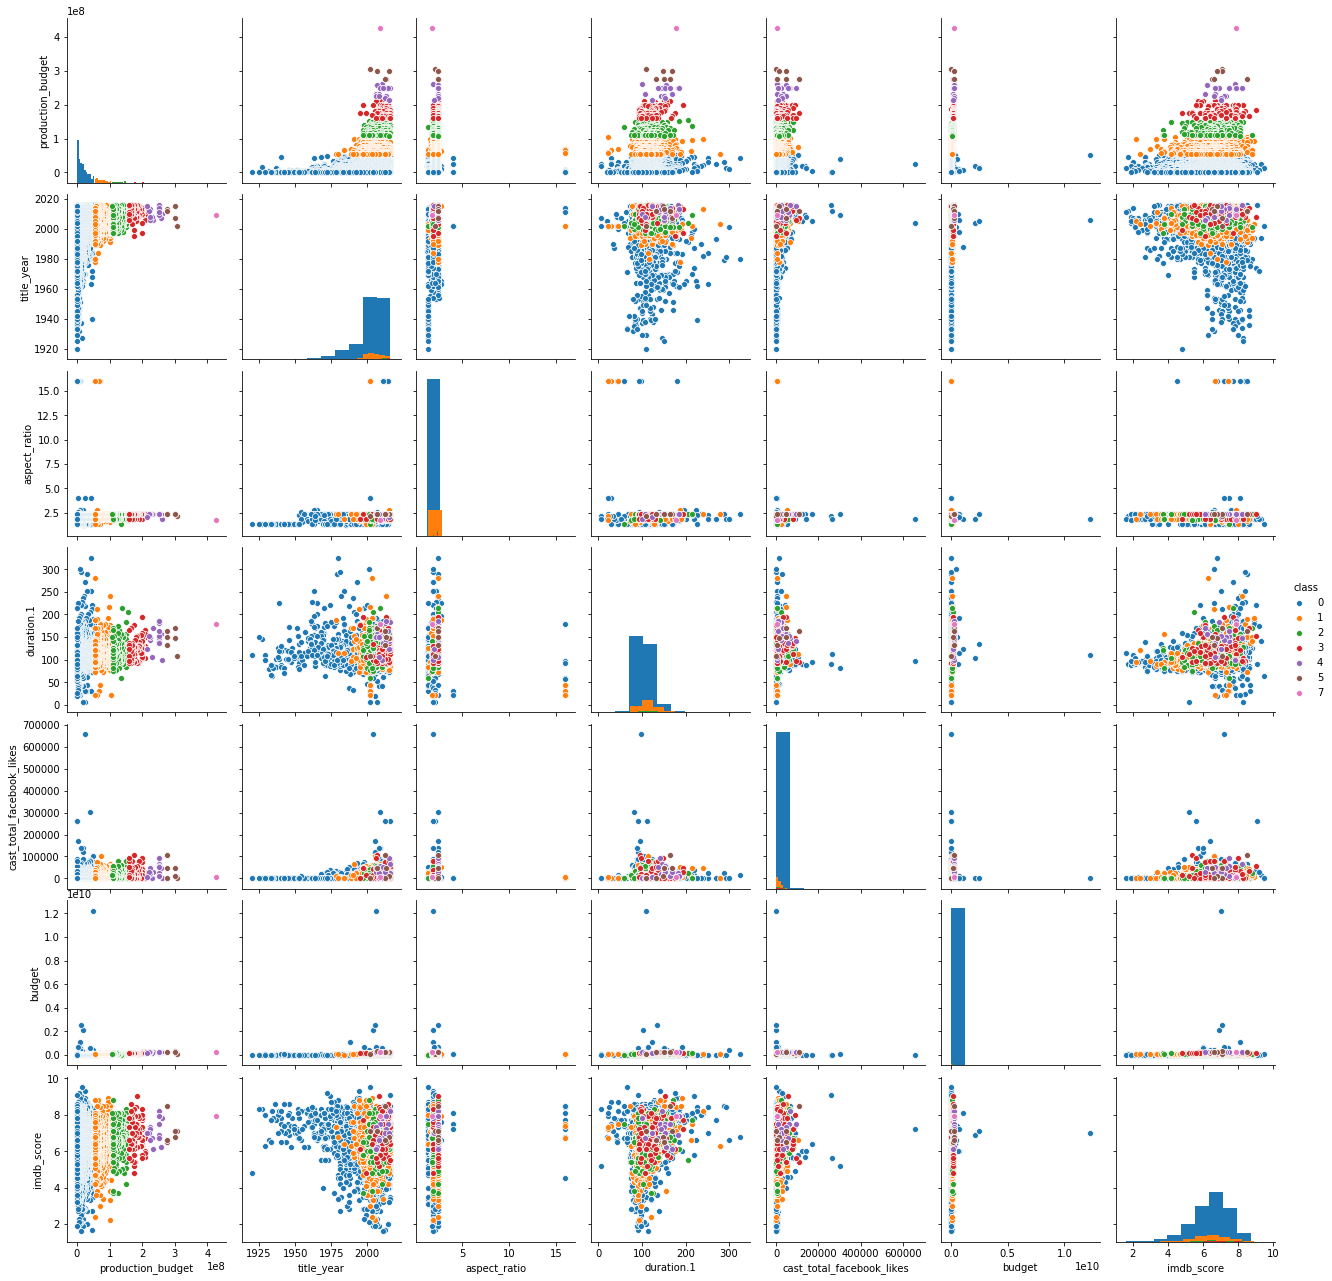

In [44]:
#sns.set(style="ticks", color_codes=True)
sns.pairplot(Z2, hue = 'class',  diag_kind="hist")
# sns.pairplot(Z2, hue = 'class')

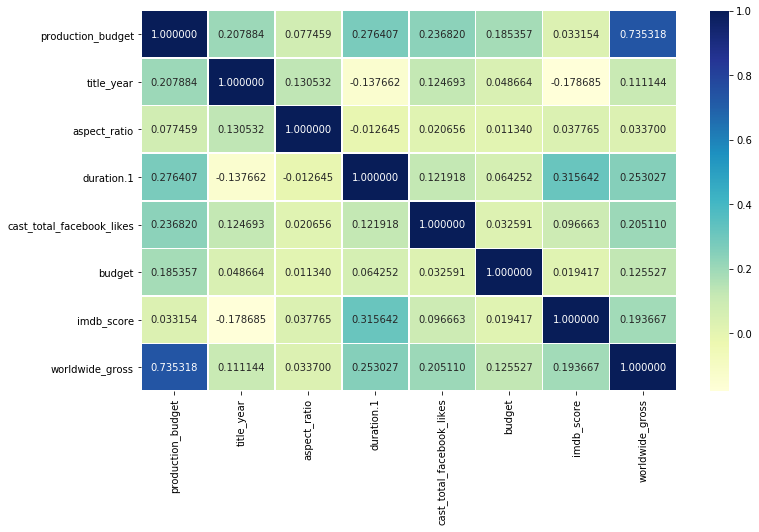

In [53]:
Z3 = pd.concat([X,y],axis=1)
sns.heatmap(Z3.corr(),cmap="YlGnBu", linewidths=.5,annot=True, fmt="f")

De esto concluimos, sin sorpresa, que son muy importantes:

- production_budget
- imdb_score

## Metodos de selección automatica de features

<div class="alert alert-info">
  Sklearn posee una serie de métodos para seleccionar las mejores features. Estos métodos los puedes encontrar en sklearn.feature_selection
</div>

In [54]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_regression

selector = SelectKBest(mutual_info_regression, k=4)
selector.fit(X,y)

SelectKBest(k=4,
            score_func=<function mutual_info_regression at 0x000001D206EBAAF8>)

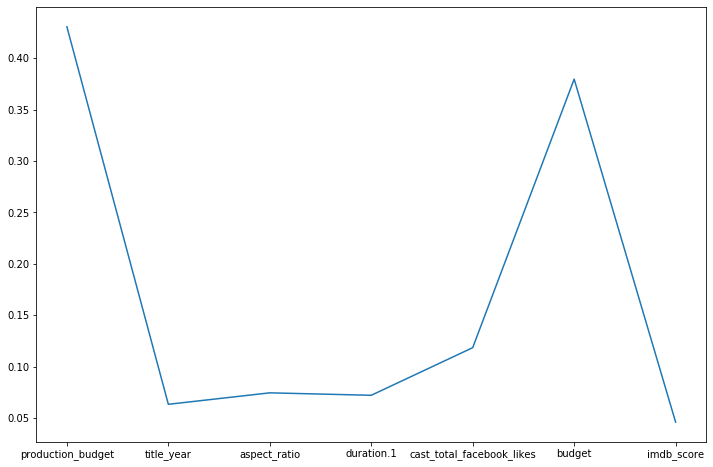

In [55]:
scores = selector.scores_
plt.rcParams["figure.figsize"] = [12,8]
plt.plot(scores)
plt.xticks(np.arange(7),list(X.columns));

Del analisis univariante obtenemos que las mejores features son:

- production_budget
- cast_total_facebook_likes
- budget

**Guardaremos las 5 features entregadas por la interpretación de nuestra regresión Lasso**

In [62]:
X2 = X[['production_budget','title_year','duration.1','cast_total_facebook_likes','imdb_score']]
X3 = X[['production_budget','cast_total_facebook_likes','imdb_score']]

## Veamos los resultados del modelo con estas features

In [63]:
X_train, X_test, y_train, y_test = train_test_split(X,y)

In [64]:
cols2 = ['production_budget','title_year','duration.1','cast_total_facebook_likes','imdb_score']
X2_train, X2_test, y2_train, y2_test = X_train[cols2], X_test[cols2], y_train, y_test

cols3 = ['production_budget','cast_total_facebook_likes','imdb_score']
X3_train, X3_test, y3_train, y3_test = X_train[cols3], X_test[cols3], y_train, y_test

In [65]:
from sklearn.linear_model import Lasso

model1 = Lasso()
model2 = Lasso()
model3 = Lasso()

model1.fit(X_train,y_train)
model2.fit(X2_train,y2_train)
model3.fit(X3_train,y3_train)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [66]:
print(model1.score(X_test,y_test))
print(model2.score(X2_test,y2_test))
print(model3.score(X3_test,y3_test))

0.5859922904001373
0.5848915084290727
0.584673039136569
